In [1]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [2]:
import numpy as np

In [3]:
# Hyper Parameters
num_epochs = 20
batch_size = 100
learning_rate = 0.01

# MNIST Dataset
train_dataset = dsets.MNIST(root='./data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/',
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
# AE model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encode1 = nn.Linear(784, 128)
        self.encode2 = nn.Linear(128, 30)
        self.decode1 = nn.Linear(30, 128)
        self.decode2 = nn.Linear(128, 784)
        
        self.activation = nn.Sigmoid()
    def forward(self, x):
        out = self.activation(self.encode1(x))
        encoded_out = self.activation(self.encode2(out))
        out = self.activation(self.decode1(encoded_out))
        out = self.decode2(out)
        return encoded_out, out
    
    
    

In [5]:
net = Autoencoder()

In [6]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        input = Variable(images.view(images.shape[0], -1))
        targets=input.clone()
        targets.require_grad=False
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        _, outputs = net(input)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch [1/20], Iter [100/600] Loss: 0.0697
Epoch [1/20], Iter [200/600] Loss: 0.0656
Epoch [1/20], Iter [300/600] Loss: 0.0630
Epoch [1/20], Iter [400/600] Loss: 0.0607
Epoch [1/20], Iter [500/600] Loss: 0.0598
Epoch [1/20], Iter [600/600] Loss: 0.0576
Epoch [2/20], Iter [100/600] Loss: 0.0543
Epoch [2/20], Iter [200/600] Loss: 0.0515
Epoch [2/20], Iter [300/600] Loss: 0.0495
Epoch [2/20], Iter [400/600] Loss: 0.0455
Epoch [2/20], Iter [500/600] Loss: 0.0460
Epoch [2/20], Iter [600/600] Loss: 0.0384
Epoch [3/20], Iter [100/600] Loss: 0.0419
Epoch [3/20], Iter [200/600] Loss: 0.0409
Epoch [3/20], Iter [300/600] Loss: 0.0399
Epoch [3/20], Iter [400/600] Loss: 0.0373
Epoch [3/20], Iter [500/600] Loss: 0.0384
Epoch [3/20], Iter [600/600] Loss: 0.0366
Epoch [4/20], Iter [100/600] Loss: 0.0355
Epoch [4/20], Iter [200/600] Loss: 0.0335
Epoch [4/20], Iter [300/600] Loss: 0.0339
Epoch [4/20], Iter [400/600] Loss: 0.0341
Epoch [4/20], Iter [500/600] Loss: 0.0308
Epoch [4/20], Iter [600/600] Loss:

In [12]:
adv_test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=1, 
                                          shuffle=True)

In [15]:
# Test the Model
net.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
correct = 0
total = 0

for images, labels in adv_test_loader:
    input=Variable(images.view(images.shape[0], -1))
    _, outputs = net(input)
    
    break
    

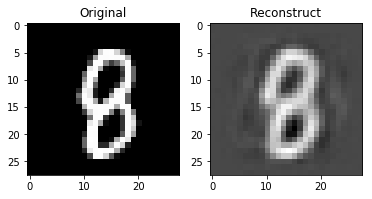

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(images.numpy().reshape(28, 28), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Reconstruct')
plt.imshow(outputs.data.numpy().reshape(28, 28), cmap='gray')


In [19]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(30, 10)
    def forward(self, x):
        out = self.fc(x)
        return out

In [21]:
classifier = Classifier()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        input = Variable(images.view(images.shape[0], -1))
        targets=Variable(labels)
        targets.require_grad=False
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        encoded, _ = net(input)
        outputs = classifier(encoded)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch [1/20], Iter [100/600] Loss: 1.5864
Epoch [1/20], Iter [200/600] Loss: 1.1975
Epoch [1/20], Iter [300/600] Loss: 0.9104
Epoch [1/20], Iter [400/600] Loss: 0.7463
Epoch [1/20], Iter [500/600] Loss: 0.8735
Epoch [1/20], Iter [600/600] Loss: 0.6497
Epoch [2/20], Iter [100/600] Loss: 0.5015
Epoch [2/20], Iter [200/600] Loss: 0.5365
Epoch [2/20], Iter [300/600] Loss: 0.7074
Epoch [2/20], Iter [400/600] Loss: 0.4936
Epoch [2/20], Iter [500/600] Loss: 0.4348
Epoch [2/20], Iter [600/600] Loss: 0.5646
Epoch [3/20], Iter [100/600] Loss: 0.6004
Epoch [3/20], Iter [200/600] Loss: 0.5796
Epoch [3/20], Iter [300/600] Loss: 0.4694
Epoch [3/20], Iter [400/600] Loss: 0.4307
Epoch [3/20], Iter [500/600] Loss: 0.5508
Epoch [3/20], Iter [600/600] Loss: 0.4781
Epoch [4/20], Iter [100/600] Loss: 0.4999
Epoch [4/20], Iter [200/600] Loss: 0.4817
Epoch [4/20], Iter [300/600] Loss: 0.4068
Epoch [4/20], Iter [400/600] Loss: 0.5050
Epoch [4/20], Iter [500/600] Loss: 0.5544
Epoch [4/20], Iter [600/600] Loss:

In [23]:
correct = 0
total = 0
for images, labels in test_loader:
    input = Variable(images.view(images.shape[0], -1))
    encoded, _ =net(input)
    outputs = classifier(encoded)
    _, predicted = torch.max(outputs.data, 1)
    
    print(outputs.data.numpy()[0])
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
    break
    
print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

[ -5.48997879 -11.5638361   -7.14506483  -2.03127193  -4.75453568
  -4.28232384 -11.4627552    8.03402519  -7.25605917  -0.34317207]
Test Accuracy of the model on the 10000 test images: 94 %


In [24]:
adv_test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=1, 
                                          shuffle=False)

In [26]:
dummy=1
s=0.
t=0.

for (x, y) in adv_test_loader :
    x, y = Variable(x, requires_grad=True), Variable(y, requires_grad=False)
    encoded, _ = net(x.view(x.shape[0], -1))
    probs = classifier(encoded)
    y_pred = np.argmax(probs.data.numpy())
    loss = nn.CrossEntropyLoss()(probs, y)
    loss.backward()
    epsilon = 0.1 
    x_grad   = torch.sign(x.grad.data)
    x_adversarial = torch.clamp(x.data + epsilon * x_grad, 0, 1)
    adversarial_encoded, _ = net(Variable(x_adversarial.view(x.shape[0], -1)))
    adversarial_probs = classifier(adversarial_encoded)
    y_pred_adversarial = np.argmax(adversarial_probs.data.numpy())
    
    print("{0} th example ".format(dummy))
    print ("True value: "+ str(y.data.numpy()[0])+"\nPredicted value : "+str(y_pred)+ "\nAdversarial :" + str(y_pred_adversarial)+"\n" )
    
    dummy+=1
    
    if y.data.numpy()[0]!=y_pred :
        t+=1
    
    if y_pred!=y_pred_adversarial :
        s+=1
    if dummy==100:
        break
        
print("Accuracy of test_model : {0:.3f} , Adversarials : {1:.3f}".format((t/dummy)*100, (s/dummy)*100))

1 th example 
True value: 7
Predicted value : 7
Adversarial :9

2 th example 
True value: 2
Predicted value : 2
Adversarial :6

3 th example 
True value: 1
Predicted value : 1
Adversarial :2

4 th example 
True value: 0
Predicted value : 0
Adversarial :2

5 th example 
True value: 4
Predicted value : 4
Adversarial :7

6 th example 
True value: 1
Predicted value : 1
Adversarial :8

7 th example 
True value: 4
Predicted value : 4
Adversarial :5

8 th example 
True value: 9
Predicted value : 9
Adversarial :5

9 th example 
True value: 5
Predicted value : 6
Adversarial :6

10 th example 
True value: 9
Predicted value : 9
Adversarial :7

11 th example 
True value: 0
Predicted value : 0
Adversarial :5

12 th example 
True value: 6
Predicted value : 6
Adversarial :2

13 th example 
True value: 9
Predicted value : 9
Adversarial :4

14 th example 
True value: 0
Predicted value : 0
Adversarial :5

15 th example 
True value: 1
Predicted value : 1
Adversarial :3

16 th example 
True value: 5
Predi